In [68]:
# Import Dependencies
import pandas as pd
import numpy as np
import requests
import json
from appid import api_key
from pprint import pprint
from citipy import citipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [2]:
# Create empty lists of longitudes and latitudes
lat = []
lng = []

# Generate 1500 randon latitudes south(lat -75) and north(lat 75) of the equator and add them to the list
for x in np.random.randint(-75,75,1500):
    lat.append(x)

# Generate 1500 randon longitudes west(lon -165) and east(lon 165) of the prime meridian and add them to the list
for y in np.random.randint(-165,165,1500):
    lng.append(y)

# zip together the two lists to obtain pairs of longitude & latitudes in a tuple
lat_lng = tuple(zip(lat,lng))
#print(lat_lng)

In [3]:
# Create empty list of cities
cities = []

# Use for loop to get the nearest city to each lat_lng pair in tuple
for x, y in lat_lng:
    city = citipy.nearest_city(x, y)
    cityName = city.city_name
    
    # Add city name to list
    cities.append(cityName)

In [4]:
# Creat empty lists of temperature, humidity, cloudiness and wind speed
temp = []
hum = []
cloud = []
windsp = []


In [5]:
# Create a dictionary of the cities, lat, and lng ...
weather_dict = {
    'City': cities,
    'Latitude': lat,
    'Longitude': lng
}

# ... and covert the dict into a dataframe with 3 columns and 1500 rows
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude
0,mollendo,-18,-73
1,poum,-21,163
2,pochutla,6,-98
3,port alfred,-68,41
4,katsuura,27,144
...,...,...,...
1495,severo-kurilsk,50,158
1496,kalikino,53,40
1497,senanga,-16,23
1498,healdsburg,38,-124


In [6]:
# Create new columns for the other variables in the dataframe using df.loc[]
weather_data.loc[:,'Temperature (F)'] = ""
weather_data.loc[:,'Humidity (%)'] = ""
weather_data.loc[:,'Cloudiness (%)'] = ""
weather_data.loc[:,'Wind Speed (mph)'] = ""

weather_data

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mollendo,-18,-73,,,,
1,poum,-21,163,,,,
2,pochutla,6,-98,,,,
3,port alfred,-68,41,,,,
4,katsuura,27,144,,,,
...,...,...,...,...,...,...,...
1495,severo-kurilsk,50,158,,,,
1496,kalikino,53,40,,,,
1497,senanga,-16,23,,,,
1498,healdsburg,38,-124,,,,


In [7]:
# define the base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" # To get the temperatures in Fahrenheit (F)


# Build partial query url
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Create an empty list to collect names of cities the data is collected on for reference porposes
cityList = []

# loop through list of cities to obtain the required data for each city
for index, row in weather_data.iterrows():
    
    # get city name from dataframe
    citiName = row['City']
    
    
    # perform API Call
    response = requests.get(query_url + citiName).json()

    # Use 'try . . . except' to skip through the results for the cities and pull the data'
    try:
        weather_data.loc[index, 'Latitude'] = response['coord']['lat']
        weather_data.loc[index, 'Longitude'] = response['coord']['lon']
        weather_data.loc[index, 'Temperature (F)'] = response['main']['temp']
        weather_data.loc[index, 'Humidity (%)'] = response['main']['humidity']
        weather_data.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        weather_data.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
        cityList.append(citiName)
        
    except (KeyError, IndexError): 
        print("City is missing complete weather data...skip")
        

City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is mi

In [8]:
# Visually inspect the data collected
weather_data.head(50)

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mollendo,-17.0231,-72.0147,19.35,83,91,3.41
1,poum,-20.2333,164.0167,24.54,59,0,9.05
2,pochutla,15.7432,-96.4661,29.7,66,40,4.12
3,port alfred,-33.5906,26.8910,18.51,79,77,4.01
4,katsuura,35.1333,140.3000,19.47,68,75,7.72
5,mahebourg,-20.4081,57.7000,24,94,75,4.63
6,rikitea,-23.1203,-134.9692,25.21,73,40,5.54
7,hermanus,-34.4187,19.2345,13.33,86,97,2.2
8,luderitz,-26.6481,15.1594,15.13,83,16,3.62
9,kahului,20.8947,-156.4700,24.93,74,40,3.6


In [10]:
# Check data types
weather_data.dtypes

City                 object
Latitude            float64
Longitude           float64
Temperature (F)      object
Humidity (%)         object
Cloudiness (%)       object
Wind Speed (mph)     object
dtype: object

In [11]:
# Convert tenp, humidity, cloudiness, and wind speed data to float
weather_data['Temperature (F)'] = pd.to_numeric(weather_data['Temperature (F)'])
weather_data['Humidity (%)'] = pd.to_numeric(weather_data['Humidity (%)'])
weather_data['Cloudiness (%)'] = pd.to_numeric(weather_data['Cloudiness (%)'])
weather_data['Wind Speed (mph)'] = pd.to_numeric(weather_data['Wind Speed (mph)'])

# Check data types again
weather_data.dtypes

City                 object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

In [12]:
# Get a count of data values to check for potential missing data
weather_data.count()


City                1500
Latitude            1500
Longitude           1500
Temperature (F)     1391
Humidity (%)        1391
Cloudiness (%)      1391
Wind Speed (mph)    1391
dtype: int64

In [16]:
# Drop rows with null values
weather_df = weather_data.dropna(axis=0, how='any')

# Verify count again
weather_df

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mollendo,-17.0231,-72.0147,19.35,83.0,91.0,3.41
1,poum,-20.2333,164.0167,24.54,59.0,0.0,9.05
2,pochutla,15.7432,-96.4661,29.70,66.0,40.0,4.12
3,port alfred,-33.5906,26.8910,18.51,79.0,77.0,4.01
4,katsuura,35.1333,140.3000,19.47,68.0,75.0,7.72
...,...,...,...,...,...,...,...
1495,severo-kurilsk,50.6789,156.1250,1.02,96.0,100.0,8.00
1496,kalikino,52.9493,39.8269,1.11,77.0,6.0,3.57
1497,senanga,-16.1167,23.2667,19.62,74.0,98.0,2.05
1498,healdsburg,38.6105,-122.8692,24.45,25.0,1.0,5.66


In [30]:
#Check for any duplicated cities, check on city, lat & lon
duplicate_cities = weather_df[weather_data.duplicated(['City','Latitude','Longitude'], keep=False)]
duplicate_cities.sort_values(by=['City'])
print("Duplicate cities based on City, Latitude and Longitude are:", duplicate_cities, sep='\n')

Duplicate cities based on City, Latitude and Longitude are:
                City  Latitude  Longitude  Temperature (F)  Humidity (%)  \
1               poum  -20.2333   164.0167            24.54          59.0   
2           pochutla   15.7432   -96.4661            29.70          66.0   
3        port alfred  -33.5906    26.8910            18.51          79.0   
4           katsuura   35.1333   140.3000            19.47          68.0   
5          mahebourg  -20.4081    57.7000            24.00          94.0   
...              ...       ...        ...              ...           ...   
1490          atuona   -9.8000  -139.0333            26.56          73.0   
1491         rikitea  -23.1203  -134.9692            25.21          73.0   
1493          hobart  -42.8794   147.3294            13.82          67.0   
1494        victoria   22.2855   114.1577            23.44          88.0   
1495  severo-kurilsk   50.6789   156.1250             1.02          96.0   

      Cloudiness (%)  Wind 

C:\Users\yu_ka\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [27]:
# Drop duplicates and keep first
weatherData = weather_df.drop_duplicates(subset=['City','Latitude','Longitude'], keep='first')

# Final count of cities
weatherData.count()

City                626
Latitude            626
Longitude           626
Temperature (F)     626
Humidity (%)        626
Cloudiness (%)      626
Wind Speed (mph)    626
dtype: int64

* The final DataFrame has 626 cities and I will now save this to complete the rest of the project

In [32]:
# Save the dataframe as a csv file
weatherData.to_csv("Data/Weather_Data.csv")

## Scatter Plots

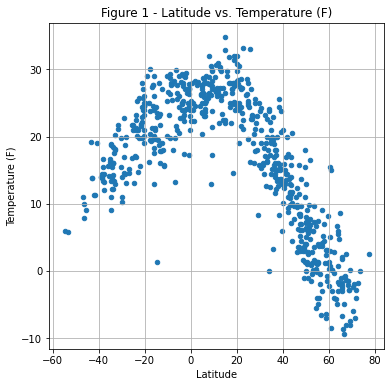

In [115]:
# 1. Temperature (F) Vs Latitude
weatherData.plot.scatter(x='Latitude', y='Temperature (F)', grid=True, figsize=(6,6), title='Figure 1 - Latitude vs. Temperature (F)')

### Temperature (F)

To understand the relationship between a city's temperature and its latitude, it is important to first understand how a city's latitude helps understand its distance from the equator (Latitude 0). First off, cities with negative latitudes lie below the equator, i.e in the southern hemisphere and cities with a positive latitude are above the equator, i.e. the northern hemisphere. The higher the absolute value of a city's latitude, the farther it is away from the equator, and vice vers. 

We see from the scatter plot that temperatures rise as we approach zero (i.e. the equator) from both the negative and positive sides. Hence the graph shows that cities that are closer to the equator are hotter than those that are farther from it. This is something I always knew but to be able to actually analyze the data and show the relationship like this is really cool.

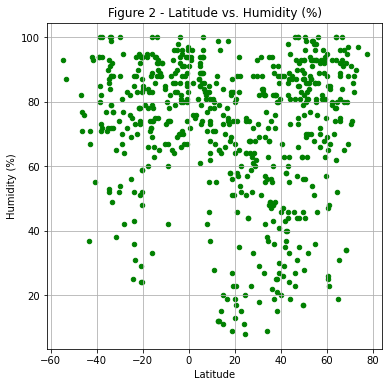

In [114]:
# 2. Humidity (%) Vs Latitude
weatherData.plot.scatter(x='Latitude', y='Humidity (%)',grid=True, color='g', figsize=(6,6), title='Figure 2 - Latitude vs. Humidity (%)')

### Humidity (%)

Humidity, a measure, as a percentage, of the amount of water in the atmosphere, does not appear to show any consistent pattern in relation to a city's distance from the equator. As the graph shows, we cities on either side of the equator both near and far that have both low and high humidity levels. 

However, one thing that is clear is that most of the cities in the sample have humidity levels of 60% or higher.

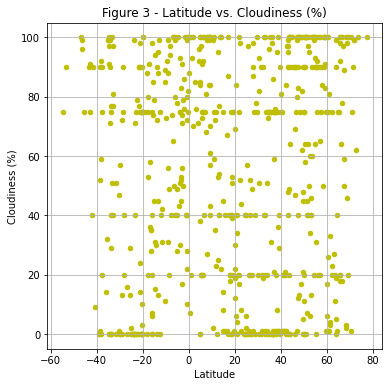

In [116]:
# 3. Cloudiness (%) Vs Latitude
weatherData.plot.scatter(x='Latitude', y='Cloudiness (%)', grid=True, color='y', figsize=(6,6), title='Figure 3 - Latitude vs. Cloudiness (%)')

### Cloudiness (%)
AS the graph shows, there appears to be no clear pattern between the amount of clouds in a city and its distance from the equator. We have cities of varying distances from the equator with 0%, 20%, 40% up to 100% clouds.

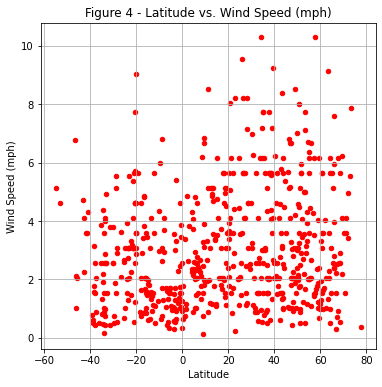

In [117]:
# 4. Wind Speed (mpg) Vs Latitude
weatherData.plot.scatter(x='Latitude', y='Wind Speed (mph)', grid=True, color='r', figsize=(6,6), title='Figure 4 - Latitude vs. Wind Speed (mph)')

### Wind Speed (mph)
As with humidity and cloudiness, wind speed does not appear to have any significant relationship with a city's distance from the equator. There appears to be a slight positve relationship between wind speed and distance from the equator for cities in the northern hemisphere, however, this does not appear to be be significant either.

One thing that is clear from the plot is that more cities are clustered between the 0mph - 4mph range, spanning varying distances from the equator from both hemispheres.

In [56]:
# Divide the dataframe into the northern (+ve lat) and southern (-ve lat) hemispheres
weatherNorth = weatherData[weatherData['Latitude'] >= 0]
weatherSouth = weatherData[weatherData['Latitude'] < 0]

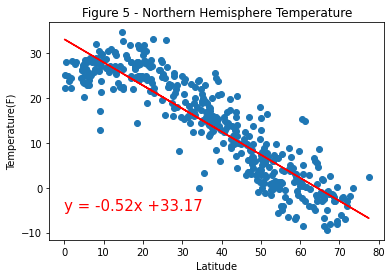

In [118]:
#Northern Hemisphere - Temperature (F) vs. Latitude

# Define the x and y variables
X = weatherNorth.loc[:,'Latitude'].values.reshape(-1, 1)
Y = weatherNorth.loc[:,'Temperature (F)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = weatherNorth.loc[:,'Latitude']
temp = weatherNorth.loc[:,'Temperature (F)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (0,-5), fontsize=15, color="r")
plt.ylabel('Temperature(F)')
plt.xlabel('Latitude')
plt.title('Figure 5 - Northern Hemisphere Temperature')
plt.show()

### Northern Hemisphere Temperature
Figure 5, which as we can see is a half of Figure 1, shows a negative relationship between temperatures and distance from the equator. This is shown by a negatively sloped regression line and equation. This means, cities closer to the north pole have lower temperatures and these temperatures increase as we move down closer toward the equator.

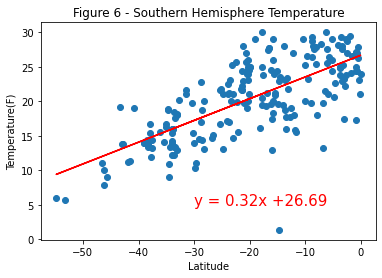

In [119]:
#Southern Hemisphere - Temperature (F) vs. Latitude

# Define the x and y variables
X = weatherSouth.loc[:,'Latitude'].values.reshape(-1, 1)
Y = weatherSouth.loc[:,'Temperature (F)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = weatherSouth.loc[:,'Latitude']
temp = weatherSouth.loc[:,'Temperature (F)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (-30,5), fontsize=15, color='r')
plt.ylabel('Temperature(F)')
plt.xlabel('Latitude')
plt.title('Figure 6 - Southern Hemisphere Temperature')
plt.show()

### Southern Hemisphere Temperature
This graph represent the cities from the southern half and it shows a positive relationship between temperatures and distance from the equator. This means, countries closer to the south pole have lower temperatures and the temperatures increase as we move away from the southpole towards the equator. The positively sloped regression line emphasizes this relationship.

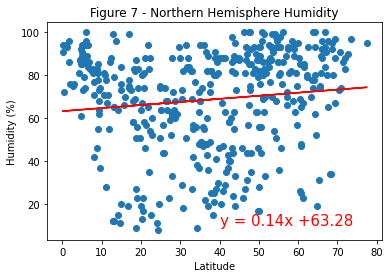

In [121]:
#Northern Hemisphere - Humidity (%) vs. Latitude

# Define the x and y variables
X = weatherNorth.loc[:,'Latitude'].values.reshape(-1, 1)
Y = weatherNorth.loc[:,'Humidity (%)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = weatherNorth.loc[:,'Latitude']
hum = weatherNorth.loc[:,'Humidity (%)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, hum)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (40,10), fontsize=15, color='r')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Figure 7 - Northern Hemisphere Humidity')
plt.show()

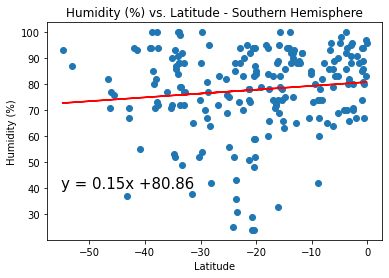

In [89]:
#Southern Hemisphere - Humidity (%) vs. Latitude

# Define the x and y variables
X = weatherSouth.loc[:,'Latitude'].values.reshape(-1, 1)
Y = weatherSouth.loc[:,'Humidity (%)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = weatherSouth.loc[:,'Latitude']
hum = weatherSouth.loc[:,'Humidity (%)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, hum)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (-55,40), fontsize=15)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Humidity (%) vs. Latitude - Southern Hemisphere')
plt.show()

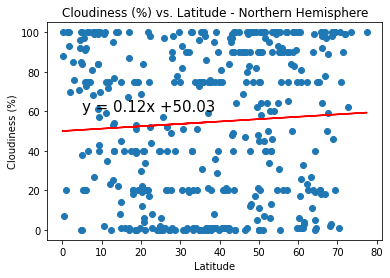

In [107]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

# Define the x and y variables
X = weatherNorth.loc[:,'Latitude'].values.reshape(-1, 1)
Y = weatherNorth.loc[:,'Cloudiness (%)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = weatherNorth.loc[:,'Latitude']
cloud = weatherNorth.loc[:,'Cloudiness (%)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (5,60), fontsize=15)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Cloudiness (%) vs. Latitude - Northern Hemisphere')
plt.show()

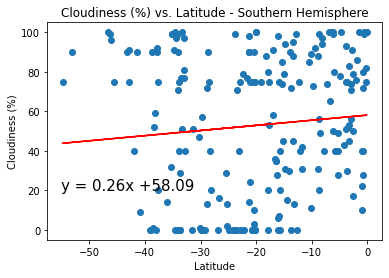

In [106]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

# Define the x and y variables
X = weatherSouth.loc[:,'Latitude'].values.reshape(-1, 1)
Y = weatherSouth.loc[:,'Cloudiness (%)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = weatherSouth.loc[:,'Latitude']
cloud = weatherSouth.loc[:,'Cloudiness (%)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (-55,20), fontsize=15)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Cloudiness (%) vs. Latitude - Southern Hemisphere')
plt.show()

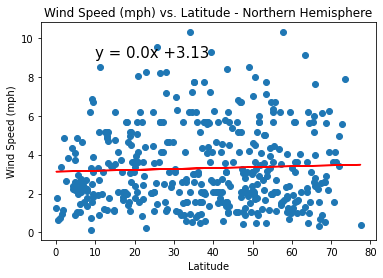

In [102]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

# Define the x and y variables
X = weatherNorth.loc[:,'Latitude'].values.reshape(-1, 1)
Y = weatherNorth.loc[:,'Wind Speed (mph)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = weatherNorth.loc[:,'Latitude']
wind = weatherNorth.loc[:,'Wind Speed (mph)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (10,9), fontsize=15)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Wind Speed (mph) vs. Latitude - Northern Hemisphere')
plt.show()

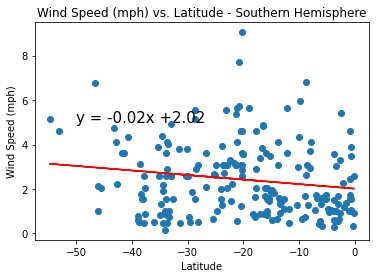

In [105]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

# Define the x and y variables
X = weatherSouth.loc[:,'Latitude'].values.reshape(-1, 1)
Y = weatherSouth.loc[:,'Wind Speed (mph)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = weatherSouth.loc[:,'Latitude']
wind = weatherSouth.loc[:,'Wind Speed (mph)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (-50,5), fontsize=15)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Wind Speed (mph) vs. Latitude - Southern Hemisphere')
plt.show()

In [ ]:
# calculating values and constructing the regression line
x_values = ave_tv_mw_cap['Weight (g)']
y_values = ave_tv_mw_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(line_eq)

# Reproducing the scatter plot and inserting the regression line and equation
plt.scatter(x_values, y_values, marker='o', facecolors='r')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(15,45),fontsize=15,color="black")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.title('Avarage Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.grid()
plt.show()

In [16]:
# Base url for get requests
url = "https://api.openweathermap.org/data/2.5/find?"

query_url = f"{url}&lat={45}&lon={105}&cnt={2}&appid={api_key}"

response = requests.get(query_url)
weather_data = response.json()
pprint(weather_data)

{'cod': '200',
 'count': 2,
 'list': [{'clouds': {'all': 100},
           'coord': {'lat': 45.2432, 'lon': 104.8051},
           'dt': 1619471180,
           'id': 2030890,
           'main': {'feels_like': 266.15,
                    'grnd_level': 854,
                    'humidity': 57,
                    'pressure': 1023,
                    'sea_level': 1023,
                    'temp': 272.36,
                    'temp_max': 272.36,
                    'temp_min': 272.36},
           'name': 'Hashaat',
           'rain': None,
           'snow': None,
           'sys': {'country': 'MN'},
           'weather': [{'description': 'overcast clouds',
                        'icon': '04n',
                        'id': 804,
                        'main': 'Clouds'}],
           'wind': {'deg': 336, 'speed': 7.15}},
          {'clouds': {'all': 100},
           'coord': {'lat': 45.05, 'lon': 105.5667},
           'dt': 1619471181,
           'id': 2028411,
           'main': {'feels_like

In [36]:
df = pd.DataFrame(weather_data['list'])
df

,id,name,coord,main,dt,wind,sys,rain,snow,clouds,weather
0,2030890,Hashaat,"{'lat': 45.2432, 'lon': 104.8051}","{'temp': 272.96, 'feels_like': 265.33, 'temp_m...",1619399157,"{'speed': 11.78, 'deg': 0}",{'country': 'MN'},None,None,{'all': 100},"[{'id': 804, 'main': 'Clouds', 'description': ..."
1,2028411,Ulaanjirem,"{'lat': 45.05, 'lon': 105.5667}","{'temp': 275.89, 'feels_like': 269.67, 'temp_m...",1619399158,"{'speed': 10.27, 'deg': 333}",{'country': 'MN'},None,None,{'all': 100},"[{'id': 804, 'main': 'Clouds', 'description': ..."
2,2031832,Doloon,"{'lat': 44.4245, 'lon': 105.3208}","{'temp': 274.74, 'feels_like': 266.54, 'temp_m...",1619399158,"{'speed': 16.99, 'deg': 271}",{'country': 'MN'},None,None,{'all': 76},"[{'id': 803, 'main': 'Clouds', 'description': ..."
3,2028722,Tsagaan-Ovoo,"{'lat': 45.5072, 'lon': 105.7559}","{'temp': 272.6, 'feels_like': 264.71, 'temp_mi...",1619399157,"{'speed': 12.24, 'deg': 342}",{'country': 'MN'},None,{'1h': 0.312},{'all': 100},"[{'id': 600, 'main': 'Snow', 'description': 'l..."
4,2029321,Sharhulsan,"{'lat': 44.65, 'lon': 104.05}","{'temp': 276.15, 'feels_like': 270.87, 'temp_m...",1619399158,"{'speed': 7.59, 'deg': 322}",{'country': 'MN'},None,None,{'all': 100},"[{'id': 804, 'main': 'Clouds', 'description': ..."
5,2029636,Ongi,"{'lat': 45.45, 'lon': 103.9}","{'temp': 275.51, 'feels_like': 268.85, 'temp_m...",1619399157,"{'speed': 11.41, 'deg': 16}",{'country': 'MN'},None,None,{'all': 100},"[{'id': 804, 'main': 'Clouds', 'description': ..."
6,2029527,Rashaant,"{'lat': 45.3, 'lon': 106.2}","{'temp': 275.37, 'feels_like': 268.5, 'temp_mi...",1619399158,"{'speed': 12.03, 'deg': 329}",{'country': 'MN'},None,None,{'all': 100},"[{'id': 804, 'main': 'Clouds', 'description': ..."
7,2029969,Mongolia,"{'lat': 46, 'lon': 105}","{'temp': 272.9, 'feels_like': 265.28, 'temp_mi...",1619399158,"{'speed': 11.65, 'deg': 354}",{'country': 'MN'},None,None,{'all': 100},"[{'id': 804, 'main': 'Clouds', 'description': ..."
8,2029495,Sangiyn Dalay,"{'lat': 46.0079, 'lon': 104.9421}","{'temp': 273.02, 'feels_like': 265.4, 'temp_mi...",1619399157,"{'speed': 11.81, 'deg': 354}",{'country': 'MN'},None,None,{'all': 100},"[{'id': 804, 'main': 'Clouds', 'description': ..."
9,2031740,Middle Govi,"{'lat': 45.5, 'lon': 106.5}","{'temp': 273.26, 'feels_like': 265.69, 'temp_m...",1619399157,"{'speed': 11.92, 'deg': 330}",{'country': 'MN'},None,None,{'all': 74},"[{'id': 803, 'main': 'Clouds', 'description': ..."
